Q1:

b0 = -6

b1 = .5

b2 = 1

x1 = 3

x2 = 3.5

z = -6+1.5+3.5 = -1

sigmoid(z) = 1/(1+e^-z) = 0.27

Q2:

2 = 1 + e^-z

1 = e^-z

z= b0 + b1 * x1 + b2 * x2

0 = -6 + .5*x1 + 1 * 3.5

x1 = 2.5 / 0.5 = 5

Q3:
* Decision boundary is the line X2 = 6: data points with X2 > 6 will be classified as Y = O and data points with x2 < 6 will be classified as Y = 1.

Q4:
* The cost function J (B) for logistic regression is convex, so any local minimum is a global minimum.
* The MLE of B, i.e., the minimizer of J (B), may not exist.
* The cost function J (B) for logistic regression is always non-negative.

Q5: 22

Q6: 48

Q7: 0.741

Q8: 

Q9: 

Q10: 

Q11: 

Q12: 

Q13: 

Q14: 

Q15: 

Q16: 

Q17: 

Q18: 

Q19: 



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import metrics
from sklearn.metrics import roc_auc_score


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "Caravan.csv"
df = pd.read_csv(url)
df.head()

df.shape


(5822, 86)

In [3]:
df_test = df.iloc[0:1000, :]
X_test = df_test.iloc[:, 0:85]
Y_test = df_test.iloc[:, 85] == 'Yes'

#X_test.shape


In [4]:
df_train = df.iloc[1000:, :]
X_train = df_train.iloc[:, 0:85]
Y_train = df_train.iloc[:, 85] == 'Yes'


In [5]:
model = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Purchase   No. Observations:                 4822
Model:                            GLM   Df Residuals:                     4737
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -928.18
Date:                Fri, 01 Dec 2023   Deviance:                       1856.4
Time:                        21:59:36   Pearson chi2:                 4.52e+03
No. Iterations:                    24   Pseudo R-squ. (CS):            0.06629
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MOSTYPE        0.0824      0.051      1.624      0.104      -0.017       0.182
MAANTHUI      -0.2038      0.209     -0.976      0.329      -0.613       0.205
MGEMOMV        0.0908      0.153      0.593      0.553      -0.209       0.391
MGEMLEEF       0.2666      0.113      2.361      0.018       0.045       0.488
MOSHOOFD      -0.3553      0.228     -1.559      0.119      -0.802       0.091
MGODRK        -0.0430      0.115     -0.373      0.709      -0.269       0.183
MGODPR         0.0176      0.127      0.138      0.890      -0.232       0.267
MGODOV         0.0753      0.114      0.658      0.511      -0.149       0.300
MGODGE        -0.0372      0.120     -0.311      0.756      -0.272       0.197
MRELGE         0.1858      0.174      1.066      0.286      -0.156       0.527
MRELSA         0.0394      0.162      0.243      0.808      -0.279       0.357
MRELOV         0.0862      0.173      0.499      0.618      -0.252       0.425
MFALLEEN      -0.0386      0.142     -0.272      0.785      -0.316       0.239
MFGEKIND      -0.0916      0.145     -0.630      0.528      -0.376       0.193
MFWEKIND      -0.0795      0.153     -0.519      0.604      -0.380       0.221
MOPLHOOG       0.0422      0.143      0.295      0.768      -0.239       0.323
MOPLMIDD      -0.0111      0.149     -0.075      0.940      -0.303       0.281
MOPLLAAG      -0.1725      0.150     -1.150      0.250      -0.467       0.122
MBERHOOG       0.1146      0.101      1.140      0.254      -0.082       0.312
MBERZELF       0.0745      0.108      0.690      0.490      -0.137       0.286
MBERBOER      -0.0634      0.119     -0.533      0.594      -0.296       0.169
MBERMIDD       0.1313      0.099      1.325      0.185      -0.063       0.325
MBERARBG       0.0467      0.100      0.469      0.639      -0.149       0.242
MBERARBO       0.0946      0.098      0.961      0.336      -0.098       0.287
MSKA          -0.0222      0.114     -0.194      0.846      -0.246       0.201
MSKB1         -0.0534      0.110     -0.484      0.628      -0.269       0.163
MSKB2         -0.0250      0.099     -0.251      0.802      -0.220       0.170
MSKC           0.0815      0.109      0.746      0.455      -0.133       0.296
MSKD           0.0070      0.106      0.066      0.947      -0.201       0.215
MHHUUR        -0.6963      1.000     -0.697      0.486      -2.656       1.263
MHKOOP        -0.6684      0.998     -0.670      0.503      -2.624       1.287
MAUT1          0.2067      0.168      1.233      0.218      -0.122       0.535
MAUT2          0.1724      0.151      1.139      0.254      -0.124       0.469
MAUT0          0.1107      0.159      0.694      0.488      -0.202       0.423
MZFONDS       -0.3483      0.997     -0.349      0.727      -2.303       1.607
MZPART        -0.4073      0.996     -0.409      0.683      -2.360       1.545
MI

In [6]:
result.aic

2026.3587820721946

In [7]:
result.predict(X_test, which = 'linear')


0     -2.288003
1     -4.618701
2     -2.821690
3     -2.344954
4     -3.566275
         ...   
995   -2.131216
996   -1.289427
997   -3.925771
998   -1.647702
999   -3.469555
Length: 1000, dtype: float64

In [8]:
Y_pred_prob = result.predict(X_test, which = 'mean')
Y_pred_prob = result.predict(X_test)
Y_pred_prob

0      0.092121
1      0.009769
2      0.056163
3      0.087468
4      0.027484
         ...   
995    0.106100
996    0.215950
997    0.019345
998    0.161420
999    0.030191
Length: 1000, dtype: float64

930
22
48
0.7393


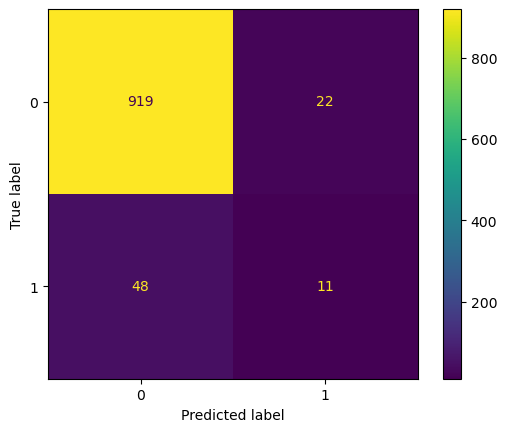

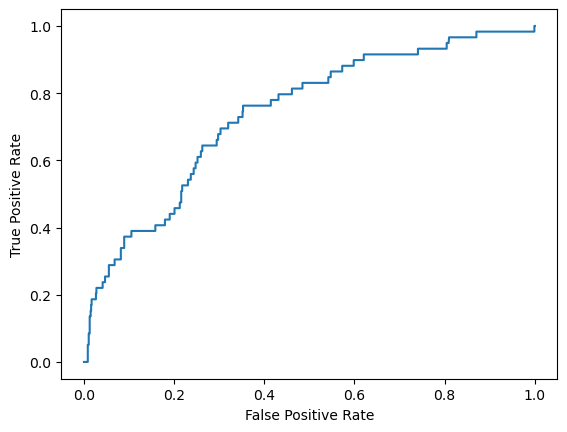

In [10]:

Y_pred_prob = result.predict(X_test)

Y_pred = Y_pred_prob  > 0.25

np.unique(Y_pred, return_counts=True)

print(np.sum((Y_test == Y_pred)))
print(np.sum((Y_test != Y_pred)[Y_test == False]))
print(np.sum((Y_test != Y_pred)[Y_test == True]))
print(round(roc_auc_score(Y_test, Y_pred_prob), 4))


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [11]:

Y_pred = Y_pred_prob  > 0.25

np.unique(Y_pred, return_counts=True)

(array([False,  True]), array([967,  33]))

In [12]:
np.sum((Y_test != Y_pred)[Y_test == False])
#np.sum((Y_test != Y_pred)[Y_test == True])
#np.sum((Y_test == Y_pred))

22

In [13]:
np.sum((Y_test != Y_pred)[Y_test == True])

48

In [14]:
from sklearn.metrics import roc_auc_score
np.round(roc_auc_score(Y_test, Y_pred_prob), 3)

0.739

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
dx = np.diff(fpr)
auroc = np.sum(dx * (tpr[1:] + tpr[:-1])) / 2
auroc

0.739287451142852

In [16]:
from scipy.stats import mannwhitneyu
def auc_mann_whitney(y, pred):
    y = np.array(y, dtype=bool)
    n1 = np.sum(y)
    n2 = np.sum(~y)
    U, _ = mannwhitneyu(pred[y], pred[~y], alternative='greater')
    return U / (n1 * n2)

# Example usage
auc_mann_whitney(Y_test, Y_pred_prob)


0.739287451142852

In [17]:
Y_test

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Purchase, Length: 1000, dtype: bool

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [19]:
"""
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])
roc_auc_score(y, clf.decision_function(X))

"""

'\nX, y = load_breast_cancer(return_X_y=True)\nclf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)\nroc_auc_score(y, clf.predict_proba(X)[:, 1])\nroc_auc_score(y, clf.decision_function(X))\n\n'

In [20]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, Y_train)

#roc_auc_score(y, clf.predict_proba(X)[:, 1])
#roc_auc_score(y, clf.decision_function(X))

In [21]:
clf.predict_proba(X_test)

array([[0.91054161, 0.08945839],
       [0.97973732, 0.02026268],
       [0.94635575, 0.05364425],
       ...,
       [0.97651387, 0.02348613],
       [0.83278934, 0.16721066],
       [0.97015258, 0.02984742]])

In [22]:
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
Y_pred_prob

array([8.94583940e-02, 2.02626841e-02, 5.36442493e-02, 8.32014654e-02,
       2.77751283e-02, 1.83640678e-02, 4.25347110e-02, 8.17823494e-03,
       3.49851064e-02, 2.11145675e-02, 9.11880030e-02, 7.71760665e-02,
       6.11434832e-02, 1.41207274e-02, 3.23094368e-02, 2.57219050e-02,
       1.98962471e-02, 7.53440874e-02, 1.07888906e-01, 9.07591585e-03,
       2.23201238e-02, 6.67173586e-02, 1.59867638e-01, 1.02637364e-02,
       4.92356425e-02, 3.32112380e-02, 1.20529298e-01, 5.60480518e-03,
       1.24390257e-03, 9.82746525e-03, 5.85148611e-02, 2.63532061e-02,
       7.24542839e-02, 1.33522808e-02, 3.52296271e-02, 1.75401122e-01,
       2.71101036e-01, 1.31353490e-02, 2.26094977e-02, 6.11802171e-02,
       9.36178182e-03, 1.82071960e-01, 5.46522386e-02, 3.47392493e-02,
       6.43024468e-02, 6.71189104e-02, 2.79122156e-02, 6.48285609e-02,
       8.60500763e-02, 8.07459016e-03, 5.32914171e-02, 1.74826161e-02,
       2.62310451e-02, 1.29039442e-02, 1.01576737e-01, 1.05768130e-01,
      

In [23]:
round(roc_auc_score(Y_test, Y_pred_prob), 3)
#clf.predict_proba(X_test)[:, 1]

0.75

In [24]:

Y_pred = Y_pred_prob  > 0.25

np.unique(Y_pred, return_counts=True)

print(np.sum((Y_test == Y_pred)))
print(np.sum((Y_test != Y_pred)[Y_test == False]))
print(np.sum((Y_test != Y_pred)[Y_test == True]))
print(round(roc_auc_score(Y_test, Y_pred_prob), 3))

929
20
51
0.75


In [25]:
def computeAIC(feature_set):
    #model = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
    model = sm.GLM(Y_train, X_train[list(feature_set)], family=sm.families.Binomial())
    result = model.fit()
    AIC = result.aic
    return {"model":result, "AIC":AIC}

def AICforward(features):
    remaining_features = [p for p in X_train.columns if p not in features]

    results = []
    
    for p in remaining_features:
        results.append(computeAIC(features+[p]))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    
    return best_model

AIC_fwd = pd.DataFrame(columns=["AIC", "model"])
features = []

for i in range(1,len(X_train.columns)):    
    AIC_fwd.loc[i] = AICforward(features)
    features = AIC_fwd.loc[i]["model"].model.exog_names

In [26]:
AIC_fwd

,AIC,model
1,2274.651774,<statsmodels.genmod.generalized_linear_model.G...
2,2195.614342,<statsmodels.genmod.generalized_linear_model.G...
3,2112.965483,<statsmodels.genmod.generalized_linear_model.G...
4,2069.69279,<statsmodels.genmod.generalized_linear_model.G...
5,2031.192144,<statsmodels.genmod.generalized_linear_model.G...
...,...,...
80,2016.391609,<statsmodels.genmod.generalized_linear_model.G...
81,2018.37176,<statsmodels.genmod.generalized_linear_model.G...
82,2020.358782,<statsmodels.genmod.generalized_linear_model.G...
83,2022.358782,<statsmodels.genmod.generalized_linear_model.G...


In [27]:
tmp = AIC_fwd['AIC'].argmin() +1
AIC_fwd.loc[tmp]["model"].model.exog_names

AIC_fwd['AIC'].argmin()

AIC_fwd.loc[tmp]["model"].model.exog_names[27]


'MHKOOP'

In [28]:
#type(X_train)
#X_train

In [29]:
def computeBIC(feature_set):
    model = sm.GLM(y, X[list(feature_set)], family=sm.families.Binomial())
    result = model.fit()
    BIC = result.aic + len(feature_set)*(np.log(len(y))-2)
    return {"model":result, "BIC":BIC}

def BICforward(features):
    remaining_features = [p for p in X.columns if p not in features]

    results = []
    
    for p in remaining_features:
        results.append(computeBIC(features+[p]))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['BIC'].argmin()]
    
    return best_model